# Exploratory research

# How work with pandas?



Where to find datasets?  


*   Google Data Search
*   World Bank Open Data
*   kaggle
*   seaborn


## First steps

In [ ]:
!pip install -upgrade pandas
#is very useful always when you star a pandas proyect's, 
#upgrade pandas because is a library that always is updating 

 Connect your notebook with your drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

upload files from your computer

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
people = pd.read_csv(io.StringIO(uploaded['people.csv'].decode('utf-8')), sep = ',' )
people = pd.read_csv('people.csv', sep = ',' )
people.head(3)

Directories navigation on your drive 

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/db' 
#this route will change according with the configuration on your drive
!ls 
#show all content in your route

Import Pandas

In [ ]:
import pandas as pd 
# is a convencion allways import pandas as pd
pd.__version__
# check pandas version

Create pandas dataframe

In [ ]:
df_name = pd.read_csv('name.csv')
#you use the method read from pandas to read_csv a dataset and 
#create a dataframe to work with it
# more information in:
https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html?highlight=read

In [ ]:
df_copy = df_name.copy()

## How start analyzing data?

The first thing tha you have to do when you want to start analyzing data is undertand the dataset. Some useful question to help you are: 
How is build your data?, What are the size?,  How many columns and rows have?, What is the type of the elementes in your dataset?, There are null elemnts? 

### Visualizing data

In [ ]:
df_name.head()
#displays  the first 5 data, 5 is the default value
df_name.head(10)
#displays  the first 10 data
df_name.tail(10)
#displays  the last 10 data
df_name.sample(10)
#displays 10 random data

Dataframe size

In [ ]:
df_name.shape
#displays the number of rows and columns
df_name.size
#displays the numbres of data in the dataframe = rows * columns

Dataframe useful information

In [ ]:
df_name.index
#displays the dataframe's index
df_name.columns
#displays the dataframe's columns
df_name.describe()
#generate descriptive statistics
#describe some information: count, mean, std, min, max 25th, 50th, and 75th percentiles
#by default only apply with numeric data
df_name.describe(include='all')
#describe some information of all columns
#columns that not have numeric data, display: count, unique, top, freq 
#and other statistics information  is display as a null 
df_name.column_name.describe()
#displays only select column
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe'

In [ ]:
df_name.info()
# displays some infromation about dataframe: 
#the index dtype and column dtypes, non-null values and memory usage
df_name.dtypes
# displays type of data in the columns
df_name.convert_dtypes()
# convert types in the correct or more specific type
df_name.nunique()
# displays the count of unique values in each column


In [ ]:
#this method don't apply directly in data frames only en series
df_name['column1'].unique()
# displays the unique elements in selected column, 
#usually use in categorical type columns
df_name['column1'].value_counts()
#dispalys the count of elements in selected column, 
#usually use in cateforical type columns

In [ ]:
df_name.values()
df_name['column1'].values()
df_name.value_counts()
df_name['column1'].value_counts()

### Type categorical

usually when a column only have two values could be a categorical variable and is useful change the type of this columns to categorical

In [ ]:
pd.Categorical(data)

In [ ]:
df_name.astype({'column1':'type'})
df_name[['column1','column2']].astype('category')
# if you want that types change in data frame, you must  re assign  columns
df_name[['column1','column2']] = df_name[['column1','column2']].astype('category')
#my recommendation is that never make modification in the original dataset, allways create copies
df_copy = df_name.copy()

In [ ]:
#create a dummi 
#dummi is a data set that show where thera are a data depending of the index
# dummis are veri useful in categorical data because you can change original 
#values in 0 and 1 
pd.get_dummies(df_name)
#you could use this method with a compliti dataframe, one or ones columns and series
#sometimes is not useful use with compliti dataframe and culd be slow
pd.get_dummies(df_name['column1'])
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies'

### Type time

In [ ]:
#data-time is very useful and have some specific methods that, can help you to analyze data
pd.to_datatime(df_name['column1'])
# usually you need more arguments that help you to transform data in data-time
pd.to_datatime(df_name['column1'],errors='coerce',format='%m/%d/%Y %H:%M:%S %p')
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html?highlight=to_datetime#pandas.to_datetime'

### Data selection 

In [ ]:
df_name[['column1','column2']]
#displays all  rows in selected columns

In [ ]:
#key = column
df_name({'key'})
df_name({'key':'value'})

In [ ]:
df_name.loc['index1']
#displays all elements in index1 
df_name.loc[['index1','index2']]
#displays all elements in index1 and index2
df_name.loc['index1','column1']
#displays elements in index1 and column1
df_name.loc['index1':'index3','column1']
#displays elements between index1 and index3
df_name.loc[[False, False, True]]
#displays elments where index = True
df_name.loc[df_name['column1'] >6 ]
#display items where the value in column 1 is greater than six
df_name.loc[df_name['column1'] > 6, ['column2']]
#display items where the value in column 1 is greater than six but only show column2
df_name.loc[lambda df_name: df_name['column1'] == 8]
# display elements where value of column1 is equal to 8
df_name.loc['index1',['column1','column2']]
df_name.loc[['index1','index2'],'column1']
#loc is useful to set elements, you would find more information 
# in the section set values
# more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html?highlight=loc#pandas.DataFrame.loc'

In [ ]:
#loc use an element's position and is very useful,
#bot remember that we start count in 0 and the last position is not inclusive
df_name.iloc[0]
#displays elements in idex 0, including index
df_name.iloc[[0]]
#displays elements in idex 0, not including index
df_name.iloc[[0, 1]]
#displays elements in idex 0 and index 1, including index
df_name.iloc[:3]
#displays 3 elements as slices
df_name.iloc[[True, False, True]]
#diplays elements where index = True
df_name.iloc[lambda x: x.index % 2 == 0]
#displays elements where indes = even number
df_name.iloc[0, 1]
# displays element in index 0 and column 1
df_name.iloc[[0, 2], [1, 3]]
#displays elements in (index 0 and column 2) and (index 1 and column 3)
df_name.iloc[1:3, 0:3]
#desplays all elements between index 1 to 3 and between columns 0 to 3
df_name.iloc[:, [True, False, True, False]]
#displays all elements where columns are True
df_name.iloc[:, lambda df_name: [0, 2]]
#displays all elements where columns have posicion 0 or 2
#more infroamtion in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc'

In [ ]:
#similar to loc bot use at if you only need to get  a single value 
#in a DataFrame 
df.at[index1, 'column1']
df.loc[index1].at['column1']
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at'

In [ ]:
#similar to iloc bot use at if you only need to get  a single value 
#in a DataFrame
 df.iat[1, 2]
 df.loc[0].iat[1]
 #more information in:
 r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat'

### MultiIndex

In [ ]:
df_name.loc[7:9]
#displays elementes in index between 7 to 9
df_name.loc['index1']
#displays all elements in the sub-index of idex one
df_name.loc[('index1','index1.1')]
#displays all elemnts in sub-index1.1
df_name.loc['index1','index1.2']
#displays all elemnts in sub-index1.2 but not including index1.2
df_name.loc[[('index1','index1.1')]]
#displays all elemnts in sub-index1.1 but indluding index1.1 and index1
df_name.loc[('index1', 'index1.1'), 'column1']
# displays elemnts in index1 , index1.1 and column1
df_name.loc[('index1', 'index1.2'):'index3']
#displays all elements between index1.2 and index 3

In [ ]:
df.xs('index1')
#displays all elements in index1 not including index1
df.xs(('index1', 'index1.1'))
#displays all elements in index1.1 not including index1.1
df.xs('index1.1', level=1)
#displays all elements in index1.1 not including index1.1 and including index1
df.xs(('index1', 'index1.1.1'),
      level=[0, 'column1.1.1'])
#displays all elements in index1.1.1 not including index1 and indes1.1.1
 df.xs('column1', axis=1)
 #displays all elemets and its index in column1
 #more nfromation in:
 r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html#pandas.DataFrame.xs'

In [ ]:
df_name.index.get_level_values(0)
# values of  first level
df_name.index.get_level_values(1)
# values of  second level

Tools

In [ ]:
#change float_format
pd.options.display.float_format='{:,.1f}'.format

In [ ]:
#is in 
df_name.isin([0, 2])
# return true in places where value is equal tu 0 or 2
df.isin({'column1': [0, 3]})
#return true in places where column1,s  values are equal tu 0 or 3
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html?highlight=isin#pandas.DataFrame.isin'


## Dataset modifications

After analyze your data set, the next step is start with the transformation of the dataset.
Usually, we do not need all the dataset to analyse it, in other times the data set have a lot of useless information, for that reason we nee to transform our data set.

my recommendation always create a copy of the original dataset to do the changes

Creation of new columns

In [ ]:
df_name['new_column1'] = data
df_name[['new_column1','new_column2']] = data

Rename


In [ ]:
df_name.rename(columns={'column1':'new_name1'})
df_name.rename(columns={'column1':'new_name1'}, inplace=True)
# apply changes in the original dataset 


Delete data

In [ ]:
df_name.drop(['column1', 'column2'], axis=1)
df_name.drop(['index1', 'index2'], axis=0)
df_name.drop(columns=['column1', 'column2'])
df_name.drop(index=['index1', 'index2'])
df.drop([0, 1])
# drop index 0 and 1
# you could combine somo of this
df.drop(index='index1', columns='column1')
df.drop(index='indes1', level=1)
# other useful methods to drop
df_name.dropna()
# drop all rows that have null element or elements
df_name.dropna(axis='columns')
# drop all columns that have null element or elements
df_name.dropna(how='all')
# drop rows or columns bot only if all elements are null by defaul is 'any'
df_name.dropna(thresh=2)
# drop rows or columns bot only if 2 elements are null by defaul is 'any'
df_name.dropna(subset=['name', 'born'])
#Define in which columns to look for missing values
df_name.dropna(inplace=True)

df_name.drop_duplicates()
# drop duplicate data
#work too similar that dropna
# more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates'

Delete data with a function

In [ ]:
def drop_useless_columns(df, drop_list):
    for column in drop_list:
        df.drop([column], axis=1, inplace=True)

In [ ]:
drop_list = ['column1', 'column2', 'column3']
drop_useless_columns(df_sample, drop_list)

Set values


In [ ]:
df_name.loc[['index1', 'index2'], ['column1']] = 50
# set value 50 in elements in column1 index 1 and 2
df_name.loc['index1'] = 10
#set value 10 in all elementes in index1
df_name.loc[:, 'column1'] = 30
#set value 30 in all elements in column1
df_name.loc[df_name['column1'] > 35] = 0
# set value 0 in all elements in column1 that are greater tham 35

In [ ]:
#similar to loc bot use at if you only need to  set a single value 
#in a DataFrame 
df_name.at[index1, 'column1'] = 10

In [ ]:
#similar to iloc bot use at if you only need to  set a single value 
#in a DataFrame 
df_name.iat[1, 2] = 10

Set index

In [ ]:
df_name.set_index('index1')
df_name.set_index(['index1', 'index2'])
#Create a MultiIndex using an Index and a column
df_name.set_index([pd.Index([1, 2, 3, 4]), 'column1'])
# create a index with a column1 in index 1,2,3,4
#more infromarion in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html?highlight=set_index#pandas.DataFrame.set_index'

In [ ]:
df_name.reset_index()
# reser all index 
#multipleindex
df_name.reset_index(level='index1.1')
# reser all index1.1
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html#pandas.DataFrame.reset_index'

In [ ]:
#Conform DataFrame to new index with optional filling logic
df_name.reindex(new_index)
df.reindex(new_index, fill_value=0)
# nan as 0
df.reindex(new_index, fill_value='missing')
# nan as missing
df.reindex(columns=['column1', 'column2'])
df.reindex(['column1', 'column2'], axis="columns")
#more infromation in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html#pandas.DataFrame.reindex'

In [ ]:
df_name.sort_idex()
df_name.sort_values(ascending=False)

In [ ]:
# apply funcion on specific ides level
df_name.sum(level='idex1')

transform categorical data to numeric data 

In [ ]:
categorical = df_name[df_name.columns[consolidado.dtypes==object].tolist()]
mask = pd.get_dummies(categorical)
columns = categorical.columns.tolist()
df_name.drop(columns, axis=1, inplace=True)
df = pd.concat([consolidado, mask],axis=1)

## Operate with data drame

If you have a data frame that onli have numeric values you can apply the follow methots

In [ ]:
#add
#Equivalent to dataframe + other
df_name.add(1)

In [ ]:
#sub
#Equivalent to dataframe - other
df.sub([1, 2], axis='columns')
#substract   1 in all values in columns1 and substract 2 in all values in columns2
df.sub(pd.Series([1, 2, 3], index=['index1', 'index2', 'index3']),
       axis='index')
#subtract 1 in all values in idex1, 2 in index2 and 3 in index3

In [ ]:
#mul
#Equivalent to dataframe * other
df_name.mul(other)
df_name.mul(other, fill_value=0)
#elements nan as 0

In [ ]:
#div
#Equivalent to dataframe / other
df_name.div(10)
#truediv
df_name.rdiv(10)
# if you 1/0 displays inf
#floodiv
#Equivalent to dataframe // other

In [ ]:
#mod
#Equivalent to dataframe % other
#pow
#Equivalent to dataframe ** other
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sub.html?highlight=sub#pandas.DataFrame.sub'

In [ ]:
#Internal product
df_name.dot(other)
df_name @ other

Apply funcions

In [ ]:
#Objects passed to the function are Series objects whose index is either 
#the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1)
df_name.apply(np.sqrt)
df_name.apply(np.sum, axis=0)
df_name.apply(lambda x: [1, 2], axis=1)
df_name.apply(lambda x: pd.Series([1, 2], index=['column1', 'column2']), axis=1)
df_name.apply(lambda x: [1, 2], axis=1, result_type='broadcast')
df_name.apply(name_fun, argument1= 0, argument2=5)
#arguments could be by position or specific
df.applymap(lambda x: len(str(x)))
#Apply a function to a Dataframe elementwise

In [ ]:
df = df.apply(lambda x: funcion(x) if(np.all(pd.notnull(x[0]))) else x, axis = 1)
#apply a funcion over a dataframe if the values is not null

### Text type

In [ ]:
df_name['column1'].str.lower()
# conevert all strings in column1 to lower case 
df_name['column1'].str.upper()
#conevert all strings in column1 to upper case 
df_name['column1'].str.capitalize()
#conevert all strings in column1 to capitalize
df_name['column1'].str.len()
#diplays len of all string in column1
df_name['column1'].str.split(' ')
# divide all strings with a caracter, in this case with a empty space 
df_name['column1'].str[:5]
# select the first 5 caracters of a string
df_name['column1'].str[-5:]
# select the last 5 caracters of a string
df_name['column1'].str.replace('strng1','new_string1')
#remplace strings
df_name['column1'].str.findall('ara')
#find  in all string the secuence of ccaracter 'ara'
df_name['column1']str.startswith('b')
df_name['column1']str.endswith('a')
df_name['column1'].str.contains('or')
#displays true in all strings that contain 'or'
df_name['column1'].str.count('a')
#count all elements a in all strings
df_name['column1'].str.extract('([0-9]+)', expand=False)
df_name['column1'].str.extractall(r"[ab](\d)")
# extract all alfanumeric alements 
df_name['column1'].str.replace('@[^\s]+','')

In [ ]:
df_name['column1'].str.zfill(3)
# add 0 equal to 3 in all strings
df_name['column1'].str.wrap(12)
#Wrap long strings to be formatted in paragraphs, max lenth 12
df_name['column1'].str.title
#convert a string to title
df_name['column1'].str.swapcase
#convert a string to swapcase
df_name['column1'].str.strip()
#delete empty spaces
df_name['column1'].str.strip('\n\f.!?')
#delete empty spaces and salected caracters
df_name['column1'].str.split()
#transform a string to list 
df_name['column1'].str.split(pat = "/")
#transform a string to list where /
df_name['column1'].str.repeat(repeats=2)
df_name['column1'].str.isupper()
df_name['column1'].str.istitle()
df_name['column1'].str.isspace()
df_name['column1'].str.isnumeric()
df_name['column1'].str.islower()
df_name['column1'].str.isdigit()
df_name['column1'].str.isdecimal()
df_name['column1'].str.isalpha()
df_name['column1'].str.isnum()

df_name['column1'].str.index()
#Return lowest indexes in each strings
df_name['column1'].str.get(1)
#get first elemnt to a string
#more information in
r'https://pandas.pydata.org/docs/search.html?q=str'

### Dataframes union


In [ ]:
pd.concat([serie1,serie2])
pd.concat([s1, s2], ignore_index=True)
pd.concat([s1, s2], keys=['s1', 's2'])
pd.concat([s1, s2], keys=['s1', 's2'],
          names=['Series name', 'Row ID'])
# dataframe
pd.concat([df1, df2])
pd.concat([df1, df3], sort=False)
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.concat.html?highlight=concat#pandas.concat'

In [ ]:
df_name.append(df_name2)
df_name.append(df_name2, ignore_index=True)
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html?highlight=append#pandas.DataFrame.append'

In [ ]:
# merge is a kind of concact bot olny if two dataframes have a comun column
pd.merge(df_left,df_raight, how='inner', on='column1')
pd.merge(df_left,df_raight, how='inner', left_on='column1',rigth_on='column3')
pd.merge(df_left,df_raight, how='outer', on='column1')
pd.merge(df_left,df_raight, how='left', on='column1')
pd.merge(df_left,df_raight, how='rigth', on='column1')
# more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge'

![](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

## Group by

sometimes is useful make sub-dataframe with some specific information, to do that we will use methot group by


In [ ]:
df_name.groupby('column1')
#displays a table where column 1 is a column of index and its values ​​change to indexes
df_name.groupby('column1').media()
df_name.groupby('column1').mean()
df_name.groupby('column1')['column2']
df_name.groupby('column1')['column2'].count()
df_name.groupby('column1')['column2'].max()
df_name.groupby('column1')['column2'].min()
df_name.groupby(['column1','column2'])
# group by multiple elements
df_name.groupby(['column1','column2'])['column3'].mean()
df_name.groupby(['column1','column2'])['column3'].mean().to_frame()
# conver a grupby to a data frame
df_name.groupby(['column1','column2'])['column3'].aggregate(['min',np.mean,max])
dict_agg={'column3':[min,max]}, 'column4':[np.mean, my_fun]
df_name.groupby(['column1','column2']).aggregate(dict_agg)
df_name-groupby('column1')[['column2']].describe()
df_name-groupby('column1')[['column2']].apply(my_fun)
# . apply only one funcion and aggregate for many funcions
# apply funcions 
# more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby'
r'https://platzi.com/clases/1794-pandas/27898-aggregation-y-groupby/'

In [ ]:
# apply filter
def f_filter(x):
 return np.mean(x[column2])>4
df_name.groupby('column1').filter(f_filter)
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html?highlight=filter#pandas.core.groupby.DataFrameGroupBy.filter'
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html?highlight=filter#pandas.DataFrame.filter'

In [ ]:
# work with categorical columns
df_name['ones']=1
df_name.groupby(['column1','column2'])[['ones']].sum
# we usa a axualiar column ones to dsplays information about two categorical columns
pd.cut(df_name['column1'],bins=3)
# create 3 bins and put all column1's data in it
pd.cut(df_name['column1'],3, labels=["bad", "medium", "good"])
# create 3 bins with name of the labels
pd.cut(df_name['column1'],bins=[3,18,35,60])
bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 5)])
pd.cut(df_name['column1'], bins)
# applay your oun bins
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.cut.html?highlight=cut#pandas.cut'
r'https://platzi.com/clases/1794-pandas/27897-group-by-extraer-valor-con-variables-categoricas/'

In [ ]:
df_name = df_name.groupby(['column']).count()
df_name = df_name.sort_values(by=['column'], ascending=False)

Pivot Table

In [ ]:
df_name.pivot(values='column3', index='column2',columns='column1')
# pivot could work with no numeric data 
df_name.pivot_table(values='column3', index='column2',columns='column1')
# display a new data frame with parametres that we input 
# original data frame shuld  not have idex or idex =  reset_index
df_name.pivot_table(values='column3', index='column2',columns='column1', aggfunc=np.media)
# when we pivot, hapen ones funcions as default mean
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html?highlight=pivot%20table'
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table'

![](https://pandas-docs.github.io/pandas-docs-travis/_images/reshaping_pivot.png)

In [ ]:
df_name.stak()
# stak is a funcion like pivot bot you do not stablish parametres 
# columns become sub- indexes
df_name.unstack()
# go back to original dataset
# un stack is useful with pivot and pivot_table
df_name.unstack().reset_index()
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack'
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html?highlight=unstack#pandas.DataFrame.unstack'


## work with null data 

In [ ]:
df_name.isnull()
df_name.isna()
df_name.isnull().sum()
# displays all elemnents null by column
df_name.notnull().sum(axis=1)
# displays all elemnents null by idex
df_name.size-df.isnull().sum().sum()
#all elemnts null in the data frame
df_name[df_name['a'].notnull()]
#filter by null elemnts


Drop null elements

In [ ]:
df.dropna()
df[['a']].dropna()
df.fillna(0)
# replace all null elements with 0
df_name.fillna(method="ffill")
#replace all null elements with following value
df_name.fillna(method="bfill")
#replace all null elements with previus value
fill = pd.Series([100, 101, 102])
df_name['column1'] = df_name['column1'].fillna(fill)
#replace all null elements with serie(fill)
df_name.fillna(df.median())
#replace all null elements with media
df_New_name = pd.concat([df_name[['column1']], df_name[['column1']].interpolate()],axis=1)
df_New_name.columns = ['d_antes','d_interpolado']
#replace all null elements with a interpolation
#more infroamtion 
r'https://pandas.pydata.org/docs/search.html?q=null'

In [ ]:
df_name.notnull().apply(pd.Series.value_counts)
(df_name !=0).apply(pd.Series.value_counts)

In [ ]:
filtro = ((df_name !=0) & (df_name.notnull()))
filtro.all(axis=1).values_counts()

In [ ]:
mask = filtro['column1']
df_name = df_name[mask]

In [ ]:
# if we have some null data and we don want drop it, we could replace this thata with a mean 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
values = imputer.fit_transform(df_name)
df_name.values # original values
values # new values
# update the original dataframe with new values
x=pd.DataFrame(values)
x.columns= df_name.columns
s.inde = df_name.index
# x = new data frame 

## Work with duplicate data

Some time you have a lot of useless data, this data will be somo duplicate data.
Is to important do not work with this data because will do wrong analysis

In [ ]:
df.duplicated()
#displays all duplicate values
df.duplicated(keep='first')
# displays as a true only first councidence
df.duplicated(keep='last')
# displays as a true only last councidence
df[~ df.duplicated()]
# filter and displays all elementes that not are duplicates
df.duplicated(keep=False)
df[df.duplicated(keep=False)]
#displays duplicate elements
df.drop_duplicates()
df.drop_duplicates(['column1'],keep='last')
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicate'


## Time series

if we have two data frames with index type time, we coul do somo specific operatios

In [ ]:
df1-df2
# display the diferneces betwent values of df1 and df2 dipendiong of the index 
# if no not have the same index displays null
df_name.diff()
#displays the diverences betwen index=time
df_name.diff().mean()
#by default the first element is null because do not have other element to compare
df_name.fillna({'column1':23,'column2':23})
# for that reason we should introduce its values with funcion fillna
df_name.cumsum()
#return cumulative sum over a DataFrame
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html?highlight=cumsum#pandas.DataFrame.cumsum'


In [ ]:
df_name.resample('7D').mean
df_name.resample('W-sun').sum(min_count=1)
df_name.resample('W-sun').sum()
df_name.resample('M').count()
# displays information in timeslots
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html?highlight=resample#pandas.DataFrame.resample'

In [ ]:
df_name.groupby(pd.Grouper(key='timecolumn', freq='M'))[['column1']].mean()
# Grouper is a very usefull funcion that work it a column wuere values are type time
df_name.groupby(pd.Grouper(key='timecolumn', freq='1D'))[['column1']].mean()
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html?highlight=grouper#pandas.Grouper'

In [ ]:
df_name['timecolumn'].rolling('2s')
# rolling create a windows in columns with values type time 
# space betwen windows are two seconds in this case
# rolling is veri usefull to apply funcions and plot
df_name['timecolumn'].rolling(window=14).apply(lambda x: np.std(x)).plot()
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html?highlight=rolling#pandas.DataFrame.rolling'
r'https://platzi.com/clases/1794-pandas/27894-series-de-tiempo-variables-nulas/'

## Working con Regex

In [ ]:
df_name['column'] = df_name['city'].replace(to_replace=r'([a-zA-Z]*\s)*London', value='London', regex=True)
# Replace columns values with regex to a spasific value 

In [ ]:
s = df_name['column1']
df = s.str.extract(r'£([0-9]+,[0-9]+)\s-\s£([0-9]+,[0-9]+)\s\w+\sannum')
#Create  a new data frame with a sextract over soma values in a array

In [ ]:
list_with_range_sannum['column1'] = list_with_range_sannum['column1'].str.replace(',', '')
#drop null spaces in a string over a column

## Plot

Make plots of Series or DataFrame

In [ ]:
df_name.plot(figsize=(10,7), title='title')
df_name.plot(kind='bar',figsize=(10,7), title='title')
df_name.plot(kind='bar',figsize=(10,7), title='title', stacked = True)
df_name[['column1','column2','column3']].plot(figsize=(10,7),kind='pie', subplots=True)
# plot index versus columns
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot'
r'https://platzi.com/clases/1794-pandas/27893-visualizacion-y-graficacion-de-datos/'

In [ ]:
df_name['column1'].hist(figsize = (10,7), bins =10)
# displays a histogram
#more information in:
r'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html?highlight=hist#pandas.DataFrame.hist'

In [ ]:
import matplotlib.pyplot as plt
df_name.plot(figsize=(10,7), title='title')
plt.xlabel('index-time')
plt.ylabel('columns')
plt.show()

In [ ]:
df_name.plot(figsize=(10,7), title='title', 
             legend = False, 
             style = ['r-','g--','b:*'])
ax.legend(['1','dos','3'])
plt.xlabel('index-time')
plt.ylabel('columns')
plt.show()

Some Examples

In [ ]:
normdata = colors.Normalize(min(X), max(X))
colormap = cm.get_cmap("Blues")
colores = colormap(normdata(X))

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(X, labels=labels, autopct= "%0.1f %%", colors=colores)
ax1.set_title("TITLE")
plt.show()

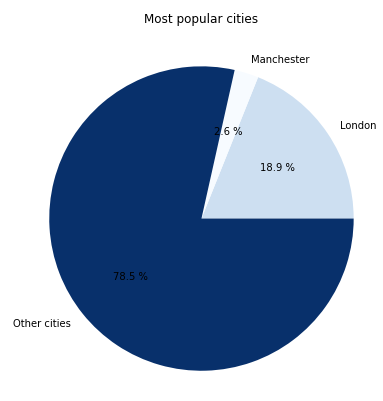

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
rects = ax.plot(labels, x, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
ax.annotate('Text', xy=(y,x), xytext = (y,x),
             arrowprops=dict(facecolor='black', shrink=0.05),)
ax.set_xlabel('X_label')
ax.set_ylabel('y_label')
ax.set_title("title")
plt.show()

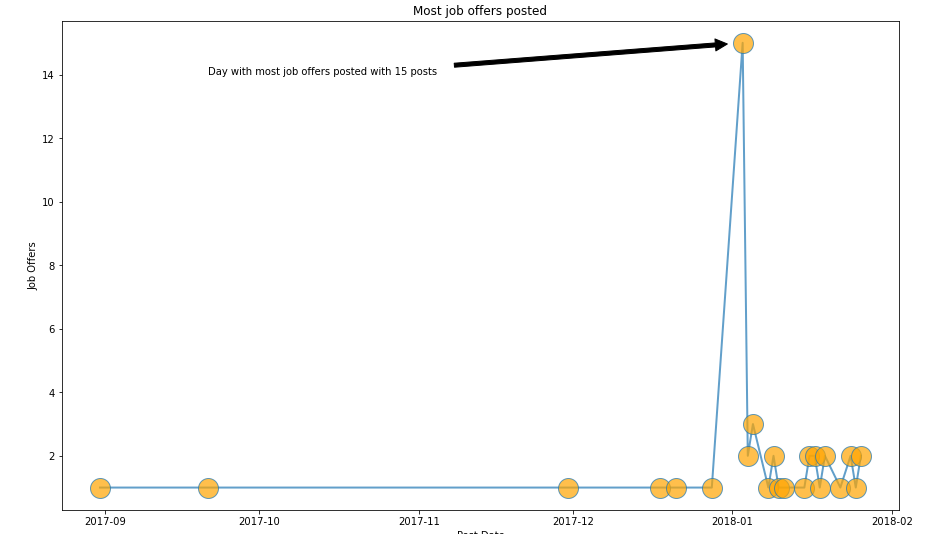

# Features selection

# Model selection

# Model optimization 